# Importing and treating CIC-DDoS-2019


In [6]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn import preprocessing

## Defining functions to load files and downsample them

Энэхүү судалгаа нь хоёртын детектор (Attack эсвэл Normal) хөгжүүлэх зорилготой тул бид эдгээр хоёр ангийн хооронд өгөгдлийн багцыг тэнцвэржүүлэх хэрэгтэй. Гэсэн хэдий ч CIC-DDOS2019 нь цөөн тооны хэвийн урсгалтай байдаг. Тиймээс доош түүвэрлэх шаардлагатай.

Дээж авах үйл явцын хувьд,
Бид хэвийн бус урсгалыг ердийн урсгалаас "олон" дахин их байлгахыг зөвшөөрдөг. Энэ арга нь дайралтын урсгалын талаарх мэдээллийн алдагдлаас урьдчилан сэргийлэхийн зэрэгцээ ангийн тэнцвэргүй байдлыг багасгах зорилготой (халдлагын урсгалын тоог ердийн тоо руу буулгах үед ML загварууд тохирохгүй).


In [7]:
mult = 5

def load_file(path):
    data = pd.read_csv(path, sep=',', low_memory=False)

    is_benign = data[' Label'] == 'BENIGN'
    flows_ok = data[is_benign]
    flows_ddos_full = data[~is_benign]
    
    sizeDownSample = len(flows_ok) * mult
    
    if sizeDownSample < len(flows_ddos_full): 
        flows_ddos_reduced = resample(flows_ddos_full,
                                      replace=False,
                                      n_samples=sizeDownSample,
                                      random_state=27)
    else:
        flows_ddos_reduced = flows_ddos_full
    
    return flows_ok, flows_ddos_reduced

 
def load_huge_file(path):
    df_chunk = pd.read_csv(path, chunksize=500000, low_memory=False)
    
    chunk_list_ok = []
    chunk_list_ddos = [] 

    for chunk in df_chunk:  
        is_benign = chunk[' Label'] == 'BENIGN'
        flows_ok = chunk[is_benign]
        flows_ddos_full = chunk[~is_benign]
        
        if len(flows_ok) * mult < len(flows_ddos_full): 
            sizeDownSample = len(flows_ok) * mult
            
            flows_ddos_reduced = resample(flows_ddos_full,
                                          replace=False,
                                          n_samples=sizeDownSample,
                                          random_state=27)
        else:
            flows_ddos_reduced = flows_ddos_full
            
        chunk_list_ok.append(flows_ok)
        chunk_list_ddos.append(flows_ddos_reduced)
        
    flows_ok = pd.concat(chunk_list_ok)
    flows_ddos = pd.concat(chunk_list_ddos)
    
    return flows_ok, flows_ddos

## Loading CIC-DDoS2019 - Day 1 (training)

In [4]:
# file 1
flows_ok, flows_ddos = load_huge_file('cicddos2019/01-12/TFTP.csv')
print('file 1 loaded')

# file 2
a, b = load_file('cicddos2019/01-12/DrDoS_LDAP.csv')
flows_ok = pd.concat([flows_ok, a], ignore_index=True)
flows_ddos = pd.concat([flows_ddos, b], ignore_index=True)
print('file 2 loaded')

# file 3
a, b = load_file('cicddos2019/01-12/DrDoS_MSSQL.csv')
flows_ok = pd.concat([flows_ok, a], ignore_index=True)
flows_ddos = pd.concat([flows_ddos, b], ignore_index=True)
print('file 3 loaded')

# file 4
a, b = load_file('cicddos2019/01-12/DrDoS_NetBIOS.csv')
flows_ok = pd.concat([flows_ok, a], ignore_index=True)
flows_ddos = pd.concat([flows_ddos, b], ignore_index=True)
print('file 4 loaded')

# file 5
a, b = load_file('cicddos2019/01-12/DrDoS_NTP.csv')
flows_ok = pd.concat([flows_ok, a], ignore_index=True)
flows_ddos = pd.concat([flows_ddos, b], ignore_index=True)
print('file 5 loaded')

# file 6
a, b = load_file('cicddos2019/01-12/DrDoS_SNMP.csv')
flows_ok = pd.concat([flows_ok, a], ignore_index=True)
flows_ddos = pd.concat([flows_ddos, b], ignore_index=True)
print('file 6 loaded')

# file 7
a, b = load_file('cicddos2019/01-12/DrDoS_SSDP.csv')
flows_ok = pd.concat([flows_ok, a], ignore_index=True)
flows_ddos = pd.concat([flows_ddos, b], ignore_index=True)
print('file 7 loaded')

# file 8
a, b = load_file('cicddos2019/01-12/DrDoS_UDP.csv')
flows_ok = pd.concat([flows_ok, a], ignore_index=True)
flows_ddos = pd.concat([flows_ddos, b], ignore_index=True)
print('file 8 loaded')

# file 9
a, b = load_file('cicddos2019/01-12/Syn.csv')
flows_ok = pd.concat([flows_ok, a], ignore_index=True)
flows_ddos = pd.concat([flows_ddos, b], ignore_index=True)
print('file 9 loaded')

# file 10
a, b = load_file('cicddos2019/01-12/DrDoS_DNS.csv')
flows_ok = pd.concat([flows_ok, a], ignore_index=True)
flows_ddos = pd.concat([flows_ddos, b], ignore_index=True)
print('file 10 loaded')

# file 11
a, b = load_file('cicddos2019/01-12/UDPLag.csv')
flows_ok = pd.concat([flows_ok, a], ignore_index=True)
flows_ddos = pd.concat([flows_ddos, b], ignore_index=True)
print('file 11 loaded')

del a, b

samples = pd.concat([flows_ddos], ignore_index=True)
samples.to_csv(r'cicddos2019/01-12/export_dataframe.csv', index=None, header=True)

del flows_ddos, flows_ok

file 1 loaded
file 2 loaded
file 3 loaded
file 4 loaded
file 5 loaded
file 6 loaded
file 7 loaded
file 8 loaded
file 9 loaded
file 10 loaded
file 11 loaded


## Loading CIC-DDoS2019 - Day 2 (testing)

In [5]:
# file 1
flows_ok, flows_ddos = load_file('cicddos2019/03-11/LDAP.csv')
print('file 1 loaded')

# file 2
a,b = load_file('cicddos2019/03-11/MSSQL.csv')
flows_ok = pd.concat([flows_ok, a], ignore_index=True)
flows_ddos = pd.concat([flows_ddos, b], ignore_index=True)
print('file 2 loaded')

# file 3
a,b = load_file('cicddos2019/03-11/NetBIOS.csv')
flows_ok = pd.concat([flows_ok, a], ignore_index=True)
flows_ddos = pd.concat([flows_ddos, b], ignore_index=True)
print('file 3 loaded')

# file 4
a,b = load_file('cicddos2019/03-11/PortMap.csv')
flows_ok = pd.concat([flows_ok, a], ignore_index=True)
flows_ddos = pd.concat([flows_ddos, b], ignore_index=True)
print('file 4 loaded')

# file 5
a,b = load_file('cicddos2019/03-11/Syn.csv')
flows_ok = pd.concat([flows_ok, a], ignore_index=True)
flows_ddos = pd.concat([flows_ddos, b], ignore_index=True)
print('file 5 loaded')
'''
# following files won't load**
# file 6

a,b = load_file('cicddos2019/03-11/UDP.csv')
flows_ok = flows_ok.append(a,ignore_index=True)
flows_ddos = flows_ddos.append(b,ignore_index=True)
print('file 6 loaded')

# file 7
a,b = load_file('cicddos2019/03-11/UDPLag.csv')
flows_ok = flows_ok.append(a,ignore_index=True)
flows_ddos = flows_ddos.append(b,ignore_index=True)
print('file 7 loaded')
'''


tests = pd.concat([flows_ddos],ignore_index=True)
tests.to_csv(r'cicddos2019/01-12/export_tests.csv', index = None, header=True) 

del flows_ddos, flows_ok, a, b


file 1 loaded
file 2 loaded
file 3 loaded
file 4 loaded
file 5 loaded


## CIC-DDoS2019 Data Processing

In [100]:
# training data
samples = pd.read_csv('cicddos2019/01-12/export_dataframe.csv', sep=',')

def string2numeric_hash(text):
    import hashlib
    return int(hashlib.md5(text).hexdigest()[:8], 16)

# Flows Packet/s e Bytes/s - Replace infinity by 0
samples = samples.replace('Infinity','0')
samples = samples.replace(np.inf,0)
samples = samples.replace('nan','0')
samples[' Flow Packets/s'] = pd.to_numeric(samples[' Flow Packets/s'])

samples['Flow Bytes/s'] = samples['Flow Bytes/s'].fillna(0)
samples['Flow Bytes/s'] = pd.to_numeric(samples['Flow Bytes/s'])


#Label
samples[' Label'] = samples[' Label'].replace('BENIGN',0)
samples[' Label'] = samples[' Label'].replace('DrDoS_DNS',1)
samples[' Label'] = samples[' Label'].replace('DrDoS_LDAP',1)
samples[' Label'] = samples[' Label'].replace('DrDoS_MSSQL',1)
samples[' Label'] = samples[' Label'].replace('DrDoS_NTP',1)
samples[' Label'] = samples[' Label'].replace('DrDoS_NetBIOS',1)
samples[' Label'] = samples[' Label'].replace('DrDoS_SNMP',1)
samples[' Label'] = samples[' Label'].replace('DrDoS_SSDP',1)
samples[' Label'] = samples[' Label'].replace('DrDoS_UDP',1)
samples[' Label'] = samples[' Label'].replace('Syn',1)
samples[' Label'] = samples[' Label'].replace('TFTP',1)
samples[' Label'] = samples[' Label'].replace('UDP-lag',1)
samples[' Label'] = samples[' Label'].replace('WebDDoS',1)

#Timestamp - Drop day, then convert hour, minute and seconds to hashing 
colunaTime = samples[' Timestamp'].str.extract(r'(\d{2}:\d{2}:\d{2})\.(\d+)')
colunaTime.columns = ['horas', 'milisec']
stringHoras = pd.DataFrame(colunaTime['horas'].str.encode('utf-8'))
samples[' Timestamp'] = pd.DataFrame(stringHoras['horas'].apply(string2numeric_hash))
del colunaTime, stringHoras


# flowID - IP origem - IP destino - Simillar HTTP -> Drop (individual flow analysis)
del samples[' Source IP']
del samples[' Destination IP']
del samples['Flow ID']
del samples['SimillarHTTP']
del samples['Unnamed: 0']

samples.to_csv(r'cicddos2019/01-12/export_dataframe_proc.csv', index = None, header=True) 
print('Training data processed')

C:\Users\Chinges\AppData\Local\Temp\ipykernel_23844\1123740656.py:2: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  samples = pd.read_csv('cicddos2019/01-12/export_dataframe.csv', sep=',')


Training data processed


In [98]:
# test data
tests = pd.read_csv('cicddos2019/01-12/export_tests.csv', sep=',')

def string2numeric_hash(text):
    import hashlib
    return int(hashlib.md5(text).hexdigest()[:8], 16)

# Flows Packet/s e Bytes/s - Change infinity by 0
tests = tests.replace('Infinity','0')
tests = tests.replace(np.inf,0)
amostras = pd.DataFrame()
amostras = amostras.replace('nan','0')
tests[' Flow Packets/s'] = pd.to_numeric(tests[' Flow Packets/s'])

tests['Flow Bytes/s'] = tests['Flow Bytes/s'].fillna(0)
tests['Flow Bytes/s'] = pd.to_numeric(tests['Flow Bytes/s'])

#Label
tests[' Label'] = tests[' Label'].replace('BENIGN',0)
tests[' Label'] = tests[' Label'].replace('LDAP',1)
tests[' Label'] = tests[' Label'].replace('NetBIOS',1)
tests[' Label'] = tests[' Label'].replace('MSSQL',1)
tests[' Label'] = tests[' Label'].replace('Portmap',1)
tests[' Label'] = tests[' Label'].replace('Syn',1)
#tests[' Label'] = tests[' Label'].replace('DrDoS_SNMP',1)
#tests[' Label'] = tests[' Label'].replace('DrDoS_SSDP',1)

#Timestamp - Drop day, then convert hour, minute and seconds to hashing 
colunaTime = tests[' Timestamp'].str.extract(r'(\d{2}:\d{2}:\d{2})\.(\d+)')
colunaTime.columns = ['horas', 'milisec']
stringHoras = pd.DataFrame(colunaTime['horas'].str.encode('utf-8'))
tests[' Timestamp'] = pd.DataFrame(stringHoras['horas'].apply(string2numeric_hash))#colunaTime['horas']
del colunaTime,stringHoras

# flowID - IP origem - IP destino - Simillar HTTP -> Deletar (analise fluxo a fluxo)
del tests[' Source IP']
del tests[' Destination IP']
del tests['Flow ID']
del tests['SimillarHTTP']
del tests['Unnamed: 0']

tests.to_csv(r'cicddos2019/01-12/export_tests_proc.csv', index = None, header=True) 
print('Test data processed')

Test data processed


## Methods implementation

Importing required library

In [116]:
# Import required libraries
from keras.models import Sequential
from keras.layers import Dense,GRU,Embedding,Dropout,Flatten,Conv1D,MaxPooling1D,LSTM
from keras.layers import GRU, LSTM, Conv1D, MaxPooling1D, Dense, Flatten, Dropout

### Gated Recurrent Units (GRU)

In [117]:
#input_size
# -> CIC-DDoS2019 82
# -> CIC-IDS2018 78
def GRU_model(input_size):
   
    # Initialize the constructor
    model = Sequential()
    model.add(GRU(32, input_shape=(input_size,1), return_sequences=False)) #
    model.add(Dropout(0.5))    
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.build()
    print(model.summary())
    
    return model

### Convolutional Neural Network (CNN)

In [118]:
def CNN_model(input_size):
   
    # Initialize the constructor
    model = Sequential()
    
    model.add(Conv1D(filters=64, kernel_size=8, activation='relu', input_shape=(input_size,1)))
    model.add(MaxPooling1D(2))
    model.add(Conv1D(filters=32, kernel_size=16, activation='relu'))
    model.add(MaxPooling1D(2))
    model.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(2))
    
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    print(model.summary())
    
    return model

### Long-Short Term Memory (LSTM)

In [119]:
def LSTM_model(input_size):
    # Initialize the constructor
    model = Sequential()
    
    model.add(LSTM(32,input_shape=(input_size,1), return_sequences=False))
    model.add(Dropout(0.5))    
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    print(model.summary())
    
    return model

### Deep Neural Network (DNN)

In [120]:
def DNN_model(input_size):
   
    # Initialize the constructor
    model = Sequential()
    
    model.add(Dense(2, activation='relu', input_shape=(input_size,)))
    model.add(Dense(100, activation='relu'))   
    model.add(Dense(40, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    
    print(model.summary())
    
    return model

# Auxiliar Functions

Implementation of auxiliar functions, such as testing, compiling/training, 3d reshape, etc. 

### train_test(samples)
> Receives a group of samples and split it in train/test sets.


In [121]:
def train_test(samples):
    # Import `train_test_split` from `sklearn.model_selection`
    from sklearn.model_selection import train_test_split
    import numpy as np
    
    # Specify the data 
    X=samples.iloc[:,0:(samples.shape[1]-1)]
    
    # Specify the target labels and flatten the array
    #y= np.ravel(amostras.type)
    y= samples.iloc[:,-1]
    
    # Split the data up in train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    return X_train, X_test, y_train, y_test


### normalize_data(X_train,X_test)

> Normalize data between -1 and 1

In [122]:
# normalize input data

def normalize_data(X_train,X_test):
    # Import `StandardScaler` from `sklearn.preprocessing`
    from sklearn.preprocessing import StandardScaler,MinMaxScaler
    
    # Define the scaler 
    #scaler = StandardScaler().fit(X_train)
    scaler = MinMaxScaler(feature_range=(-1, 1)).fit(X_train)
    
    # Scale the train set
    X_train = scaler.transform(X_train)
    
    # Scale the test set
    X_test = scaler.transform(X_test)
    
    return X_train, X_test

### format_{2,3}d()

> Reshape data in 3d or 2d format (for input in methods such as GRU, CNN and LSTM)

In [123]:
# Reshape data input

def format_3d(df):
    
    X = np.array(df)
    return np.reshape(X, (X.shape[0], X.shape[1], 1))

def format_2d(df):
    
    X = np.array(df)
    return np.reshape(X, (X.shape[0], X.shape[1]))

### compile_train(model,X_train,y_train,deep=True)

> Compile and train learning model

> deep = False for scikit-learn ML methods

In [124]:
# compile and train learning model
def compile_train(model,X_train,y_train,deep=True):
    
    if(deep==True):
        import matplotlib.pyplot as plt

        model.compile(loss='binary_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])
        
        history = model.fit(X_train, y_train,epochs=10, batch_size=256, verbose=1)
        #model.fit(X_train, y_train,epochs=3)

        # summarize history for accuracy
        plt.plot(history.history['accuracy'])
        plt.title('model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train'], loc='upper left')
        plt.show()
        # summarize history for loss
        plt.plot(history.history['loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train'], loc='upper left')
        plt.show()

        print(model.metrics_names)
    
    else:
        model.fit(X_train, y_train) #SVM, LR, GD
    
    print('Model Compiled and Trained')
    return model

### testes(model,X_test,y_test,y_pred, deep=True)

> Testing performance outcomes of the methods

> deep = False for scikit-learn ML methods


In [142]:
# Testing performance outcomes of the methods

def testes(model,X_test,y_test,y_pred, deep=True):
    if(deep==True): 
        score = model.evaluate(X_test, y_test,verbose=1)

        print(score)
    
    # Alguns testes adicionais
    y_test = format_2d(y_test)
    y_pred = format_3d(y_pred)
    
    
    # Import the modules from `sklearn.metrics`
    from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score, accuracy_score
    
    # Accuracy 
    acc = accuracy_score(y_test, y_pred)
    print('\nAccuracy')
    print(acc)
    
    # Precision 
    prec = precision_score(y_test, y_pred)#,average='macro')
    print('\nPrecision')
    print(prec)
    
    # Recall
    rec = recall_score(y_test, y_pred) #,average='macro')
    print('\nRecall')
    print(rec)
    
    # F1 score
    f1 = f1_score(y_test,y_pred) #,average='macro')
    print('\nF1 Score')
    print(f1)
    
    #average
    avrg = (acc+prec+rec+f1)/4
    print('\nAverage (acc, prec, rec, f1)')
    print(avrg)
    
    return acc, prec, rec, f1, avrg

### test_normal_atk(y_test,y_pred):

> Calculate the correct classification rate of normal and attack flow records

In [126]:
def test_normal_atk(y_test,y_pred):
    df = pd.DataFrame()
    df['y_test'] = y_test
    df['y_pred'] = y_pred
    
    normal = len(df.query('y_test == 0'))
    atk = len(y_test)-normal
    
    wrong = df.query('y_test != y_pred')
    
    normal_detect_rate = (normal - wrong.groupby('y_test').count().iloc[0][0]) / normal
    atk_detect_rate = (atk - wrong.groupby('y_test').count().iloc[1][0]) / atk
    
    print(normal_detect_rate,atk_detect_rate)
    
    return normal_detect_rate, atk_detect_rate

### Saving and Loading methods

> Methods for saving and loading trained models

In [127]:
import os
import pickle
from keras.models import model_from_json

def save_model(model, name):
    # Create the 'Models' directory if it doesn't exist
    if not os.path.exists('Models'):
        os.makedirs('Models')

    # Save model architecture to JSON
    model_json = model.to_json()
    with open(f'Models/{name}.json', 'w') as json_file:
        json_file.write(model_json)

    # Save model weights to HDF5
    model.save_weights(f'Models/{name}.h5')
    print('Model saved')

def load_model(name):
    # Load model architecture from JSON
    with open(f'Models/{name}.json', 'r') as json_file:
        loaded_model_json = json_file.read()
    loaded_model = model_from_json(loaded_model_json)

    # Load model weights from HDF5
    loaded_model.load_weights(f'Models/{name}.h5')
    print('Model loaded')

    return loaded_model

def save_sklearn(model, name):
    # Create the 'Models' directory if it doesn't exist
    if not os.path.exists('Models'):
        os.makedirs('Models')

    # Save scikit-learn model to pickle file
    with open(f'Models/{name}.pkl', 'wb') as file:
        pickle.dump(model, file)
    print('Scikit-learn model saved')

def load_sklearn(name):
    # Load scikit-learn model from pickle file
    with open(f'Models/{name}.pkl', 'rb') as file:
        loaded_model = pickle.load(file)
    print('Scikit-learn model loaded')
    return loaded_model

# Main script for testing the learning methods

> **Dataset - CIC-DDoS2019**

Loading training dataset (day 1), upsampling normal flows for balancing the training set. 

In [131]:
# UPSAMPLE OF NORMAL FLOWS
    
samples = pd.read_csv('cicddos2019/01-12/export_dataframe_proc.csv', sep=',')

X_train, X_test, y_train, y_test = train_test(samples)


#junta novamente pra aumentar o numero de normais
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
is_benign = X[' Label'] == 0 #base de dados toda junta

normal = X[is_benign]
ddos = X[~is_benign]

# upsample minority
normal_upsampled = resample(normal,
                          replace=True, # sample with replacement
                          n_samples=len(ddos), # match number in majority class
                          random_state=27) # reproducible results
# combine majority and upsampled minority
upsampled = pd.concat([normal_upsampled, ddos])

# Specify the data 
X_train=upsampled.iloc[:,0:(upsampled.shape[1]-1)]    #DDoS
y_train= upsampled.iloc[:,-1]  #DDoS

input_size = (X_train.shape[1], 1)

del X, normal_upsampled, ddos, upsampled, normal #, l1, l2 

ValueError: high <= 0

Importing the test dataset (day 2) and normalizing data.

In [ ]:
tests = pd.read_csv('cicddos2019/01-12/export_tests_proc.csv', sep=',')

X_test = np.concatenate((X_test,(tests.iloc[:,0:(tests.shape[1]-1)]).to_numpy())) # testar 33% + dia de testes
y_test = np.concatenate((y_test,tests.iloc[:,-1]))

del X_test,y_test                            # testar só o dia de testes
X_test = tests.iloc[:,0:(tests.shape[1]-1)]                        
y_test = tests.iloc[:,-1]

print((y_test.shape))
print((X_test.shape))

X_train, X_test = normalize_data(X_train,X_test)

(248815,)
(248815, 82)


Compiling and Training the methods

> Comment the last 2 code blocks

**OR**

Loading and compiling the methods

> Comment the first 2 code blocks

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 32)                3360      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_13 (Dense)            (None, 10)                330       
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 3701 (14.46 KB)
Trainable params: 3701 (14.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Para

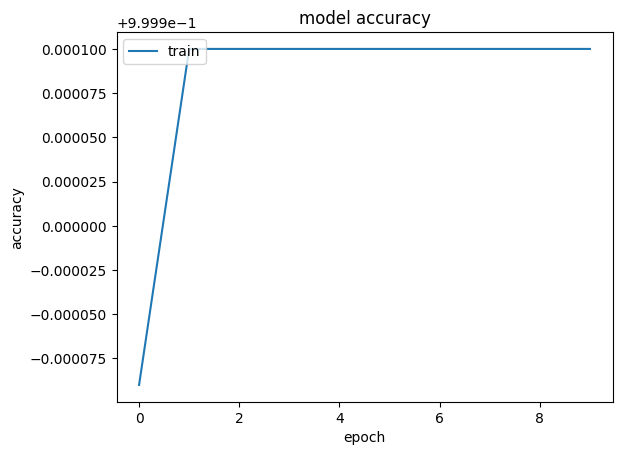

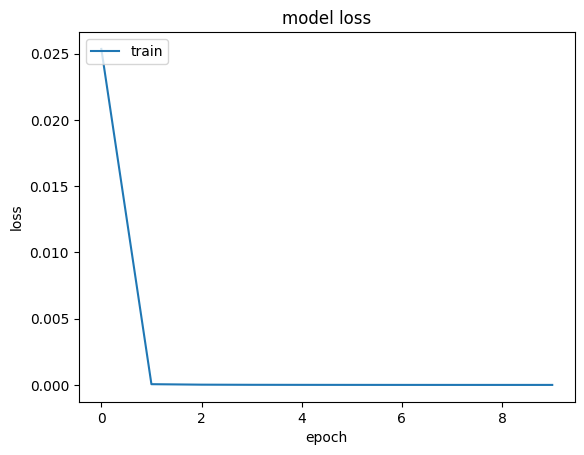

['loss', 'accuracy']
Model Compiled and Trained
Epoch 1/10
720/720 [==============================] - 15s 19ms/step - loss: 31146.2383 - accuracy: 0.9939
Epoch 2/10
720/720 [==============================] - 14s 19ms/step - loss: 195.7565 - accuracy: 0.9994
Epoch 3/10
720/720 [==============================] - 13s 18ms/step - loss: 86.0168 - accuracy: 0.9999
Epoch 4/10
720/720 [==============================] - 13s 18ms/step - loss: 6.3762 - accuracy: 1.0000
Epoch 5/10
720/720 [==============================] - 13s 18ms/step - loss: 4.0223 - accuracy: 1.0000
Epoch 6/10
720/720 [==============================] - 14s 19ms/step - loss: 21.0316 - accuracy: 0.9999
Epoch 7/10
720/720 [==============================] - 13s 19ms/step - loss: 1.2016 - accuracy: 1.0000
Epoch 8/10
720/720 [==============================] - 13s 18ms/step - loss: 1.0901 - accuracy: 1.0000
Epoch 9/10
720/720 [==============================] - 13s 18ms/step - loss: 0.2305 - accuracy: 1.0000
Epoch 10/10
720/720 [=====

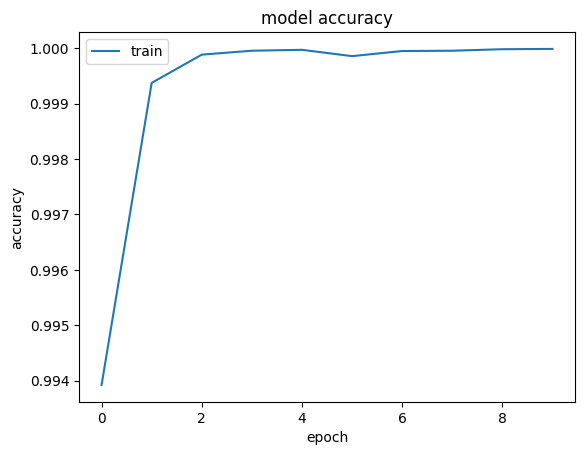

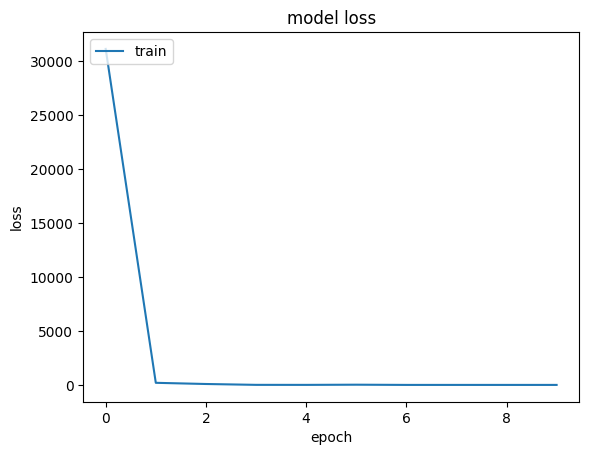

['loss', 'accuracy']
Model Compiled and Trained
Epoch 1/10
720/720 [==============================] - 28s 37ms/step - loss: 0.0287 - accuracy: 0.9953
Epoch 2/10
720/720 [==============================] - 26s 36ms/step - loss: 1.6204e-04 - accuracy: 1.0000
Epoch 3/10
720/720 [==============================] - 26s 36ms/step - loss: 5.7024e-05 - accuracy: 1.0000
Epoch 4/10
720/720 [==============================] - 26s 35ms/step - loss: 2.6964e-05 - accuracy: 1.0000
Epoch 5/10
720/720 [==============================] - 26s 36ms/step - loss: 1.4725e-05 - accuracy: 1.0000
Epoch 6/10
720/720 [==============================] - 26s 35ms/step - loss: 8.3700e-06 - accuracy: 1.0000
Epoch 7/10
720/720 [==============================] - 25s 35ms/step - loss: 5.0523e-06 - accuracy: 1.0000
Epoch 8/10
720/720 [==============================] - 25s 35ms/step - loss: 3.7697e-06 - accuracy: 1.0000
Epoch 9/10
720/720 [==============================] - 25s 35ms/step - loss: 2.1799e-06 - accuracy: 1.0000
Ep

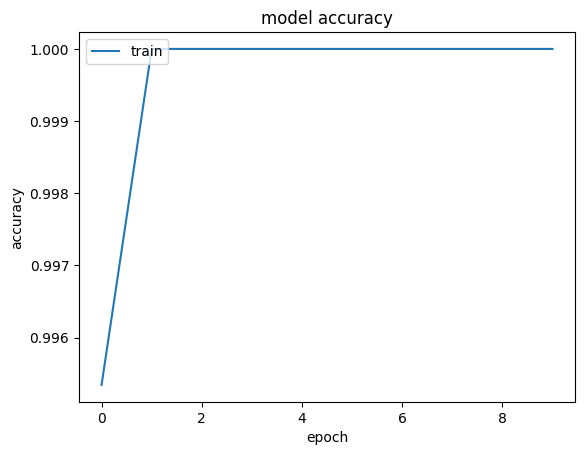

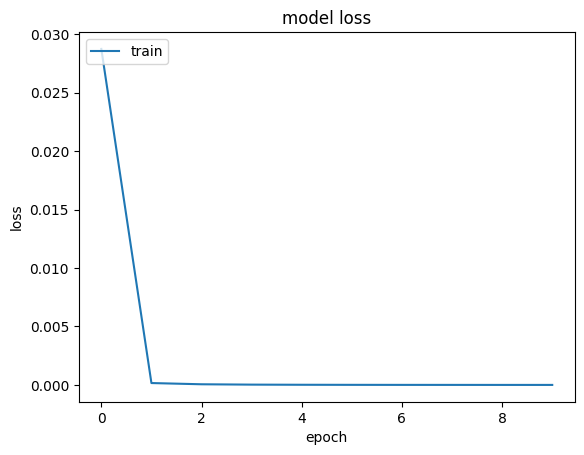

['loss', 'accuracy']
Model Compiled and Trained
Epoch 1/10
720/720 [==============================] - 2s 1ms/step - loss: 62988.5938 - accuracy: 0.9933
Epoch 2/10
720/720 [==============================] - 1s 1ms/step - loss: 0.1117 - accuracy: 1.0000
Epoch 3/10
720/720 [==============================] - 1s 1ms/step - loss: 0.0758 - accuracy: 1.0000
Epoch 4/10
720/720 [==============================] - 1s 1ms/step - loss: 0.0533 - accuracy: 1.0000
Epoch 5/10
720/720 [==============================] - 1s 1ms/step - loss: 0.0371 - accuracy: 1.0000
Epoch 6/10
720/720 [==============================] - 1s 1ms/step - loss: 0.0266 - accuracy: 1.0000
Epoch 7/10
720/720 [==============================] - 1s 1ms/step - loss: 0.0190 - accuracy: 1.0000
Epoch 8/10
720/720 [==============================] - 1s 1ms/step - loss: 0.0137 - accuracy: 1.0000
Epoch 9/10
720/720 [==============================] - 1s 1ms/step - loss: 0.0100 - accuracy: 1.0000
Epoch 10/10
720/720 [===========================

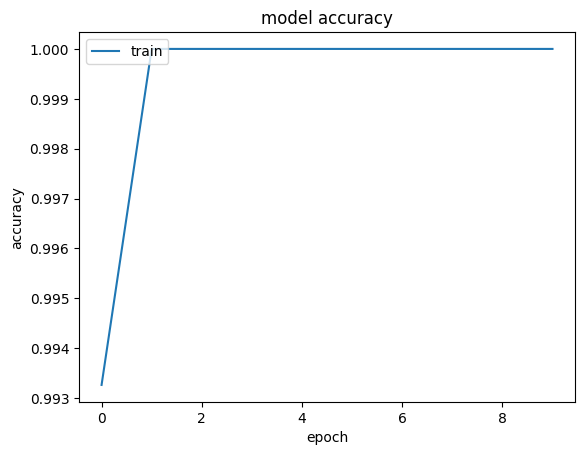

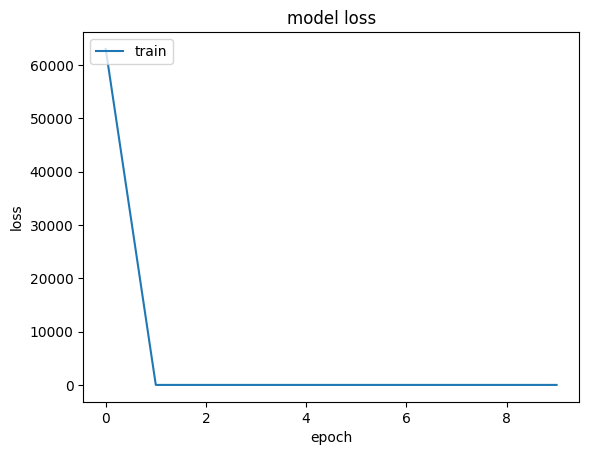

['loss', 'accuracy']
Model Compiled and Trained


In [134]:

## Comment next 2 blocks if loading pre-trained models
## Execute them if training new models

model_gru = GRU_model(82) #quando treina novo modelo
model_cnn = CNN_model(82)
model_lstm = LSTM_model(82)
model_dnn = DNN_model(X_train.shape[1])

model_gru = compile_train(model_gru,format_3d(X_train),y_train)  #quando treina novo modelo, ou retreina
model_cnn = compile_train(model_cnn,format_3d(X_train),y_train)
model_lstm = compile_train(model_lstm,format_3d(X_train),y_train)
model_dnn = compile_train(model_dnn,X_train,y_train)

## Comment next 2 blocks if training new models
## Execute them if loading pre-trained models


#model_gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) #qdo carrega modelo salvo
#model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model_dnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Testing CIC-DDoS2019 

In [140]:
results = pd.DataFrame(columns=['Method','Accuracy','Precision','Recall', 'F1_Score', 'Average','Normal_Detect_Rate','Atk_Detect_Rate'])

### GRU

In [141]:
y_pred = model_gru.predict(format_3d(X_test)) 

y_pred = y_pred.round()
 
acc, prec, rec, f1, avrg = testes(model_gru,format_3d(X_test),y_test,y_pred)

norm, atk = test_normal_atk(y_test,y_pred)

results = results.append({'Method':'GRU', 'Accuracy':acc, 'Precision':prec, 'F1_Score':f1,
                          'Recall':rec,'Average':avrg, 'Normal_Detect_Rate':norm, 'Atk_Detect_Rate':atk}, ignore_index=True)

2837/2837 [==============================] - 10s 4ms/step - loss: 4.1818e-10 - accuracy: 1.0000
[4.1817727058912624e-10, 1.0]


NameError: name 'formatar2d' is not defined

### CNN

In [138]:
y_pred = model_cnn.predict(format_3d(X_test)) 

y_pred = y_pred.round()
 
acc, prec, rec, f1, avrg = testes(model_cnn,format_3d(X_test),y_test,y_pred)

norm, atk = test_normal_atk(y_test,y_pred)

results = results.append({'Method':'CNN', 'Accuracy':acc, 'Precision':prec, 'F1_Score':f1,
                          'Recall':rec,'Average':avrg, 'Normal_Detect_Rate':norm, 'Atk_Detect_Rate':atk}, ignore_index=True)

2837/2837 [==============================] - 4s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000
[0.0, 1.0]


IndexError: tuple index out of range

### LSTM

In [ ]:
y_pred = model_lstm.predict(format_3d(X_test)) 

y_pred = y_pred.round()
 
acc, prec, rec, f1, avrg = testes(model_lstm,format_3d(X_test),y_test,y_pred)

norm, atk = test_normal_atk(y_test,y_pred)

results = results.append({'Method':'LSTM', 'Accuracy':acc, 'Precision':prec, 'F1_Score':f1,
                          'Recall':rec,'Average':avrg, 'Normal_Detect_Rate':norm, 'Atk_Detect_Rate':atk}, ignore_index=True)

### DNN

In [ ]:
y_pred = model_dnn.predict(X_test) 

y_pred = y_pred.round()
 
acc, prec, rec, f1, avrg = testes(model_dnn,X_test,y_test,y_pred)

norm, atk = test_normal_atk(y_test,y_pred)

results = results.append({'Method':'DNN', 'Accuracy':acc, 'Precision':prec, 'F1_Score':f1,
                          'Recall':rec,'Average':avrg, 'Normal_Detect_Rate':norm, 'Atk_Detect_Rate':atk}, ignore_index=True)

# Discussion and Results

Showing the table 'results', containing the performance metrics outcomes for each method.

In [ ]:
results

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Method</th>
      <th>Accuracy</th>
      <th>Precision</th>
      <th>Recall</th>
      <th>F1_Score</th>
      <th>Average</th>
      <th>Normal_Detect_Rate</th>
      <th>Atk_Detect_Rate</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>GRU</td>
      <td>0.998583</td>
      <td>0.999509</td>
      <td>0.998790</td>
      <td>0.999150</td>
      <td>0.999008</td>
      <td>0.997548</td>
      <td>0.998790</td>
    </tr>
    <tr>
      <th>2</th>
      <td>CNN</td>
      <td>0.987725</td>
      <td>0.994210</td>
      <td>0.991042</td>
      <td>0.992623</td>
      <td>0.991400</td>
      <td>0.971143</td>
      <td>0.991042</td>
    </tr>
    <tr>
      <th>3</th>
      <td>LSTM</td>
      <td>0.978297</td>
      <td>0.999180</td>
      <td>0.974756</td>
      <td>0.986817</td>
      <td>0.984763</td>
      <td>0.996001</td>
      <td>0.974756</td>
    </tr>
    <tr>
      <th>4</th>
      <td>DNN</td>
      <td>0.997441</td>
      <td>0.998140</td>
      <td>0.998790</td>
      <td>0.998465</td>
      <td>0.998209</td>
      <td>0.990696</td>
      <td>0.998790</td>
    </tr>

  </tbody>
</table>
</div>

**Classification Metrics:**
* Accuracy
* Precision
* Recall
* F1 Measure (F1 Score)

Showing performance outcomes of the methods: 
* GRU
* DNN

LSTM and CNN were separated for visualization improvement.

> GRU showed the most balanced approach regarding classifying normal and attack flows. 

> Although CNN achieved a relatively good classification of attacks, the classification of normal record flows was low compared to other methods. This result can explain the Accuracy rate of this method. This situation also occurs with the LSTM method, which achieved a good classification rate for normal flows and a low classification rate for attack ones. 